DATA SCIENCE JOBS

INTRODUCTION

This dataset contains information on job candidates applying for data science roles. It includes demographic details, education background, work experience, and training hours. The target variable indicates whether a candidate is looking for a new job (1) or not (0).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
# Load the dataset 
df = pd.read_csv('data_science job.csv')
(df)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0


Understand the Data

In [7]:
df.shape

(19158, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.9+ MB


checking Missing Data

In [15]:
# Check for missing values in each column
print(df.isnull().sum())


enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64


In [17]:
#finding duplicates
df.duplicated().sum()

0

HANDLING MISSING VALUES

In [20]:
# Divide columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [22]:
# Impute missing values for numerical columns with the mean
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())


In [24]:
# Impute missing values for categorical columns with the mode
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])



In [26]:
# Verify missing values after imputation
print(df.isnull().sum())

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64


In [28]:
# View the first few rows of the dataframe after handling missing data
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Pvt Ltd,83.0,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0


Exploratory Data Analysis (EDA)

In [31]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.250,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828951,0.121783,0.448,0.743,0.899,0.92,0.949
experience,19158.0,9.928036,6.494223,0.000,4.000,9.000,16.00,20.000
training_hours,19158.0,65.185787,58.676137,1.000,24.000,50.000,86.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.000,0.000,0.00,1.000


In [33]:
df.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
count,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,3,2,3,5,6,8,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
freq,4355,17729,13792,14203,12058,17305,9021,15957


In [35]:
(df.columns)


Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

 Encoding Categorical Variables

In [38]:
# One-Hot Encoding for columns like 'city', 'enrolled_university', 'major_discipline', 'company_size', and 'company_type'
df = pd.get_dummies(df, columns=['city', 'enrolled_university', 'major_discipline', 'company_size', 'company_type'])


In [40]:

# 2. Label Encoding for 'gender', 'relevent_experience', 'education_level'
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])  # Male=1, Female=0, Other=2
df['relevent_experience'] = label_encoder.fit_transform(df['relevent_experience'])  # Yes=1, No=0
df['education_level'] = label_encoder.fit_transform(df['education_level'])  # Master’s=1, Bachelor’s=0, PhD=2

# The 'experience' and 'training_hours' columns remain unchanged as they are numerical
# The 'target' column also remains unchanged (binary indicator)



In [42]:
# Display the transformed DataFrame
print(df)

       enrollee_id  city_development_index  gender  relevent_experience  \
0             8949                   0.920       1                    0   
1            29725                   0.776       1                    1   
2            11561                   0.624       1                    1   
3            33241                   0.789       1                    1   
4              666                   0.767       1                    0   
...            ...                     ...     ...                  ...   
19153         7386                   0.878       1                    1   
19154        31398                   0.920       1                    0   
19155        24576                   0.920       1                    0   
19156         5756                   0.802       1                    0   
19157        23834                   0.855       1                    1   

       education_level  experience  training_hours  target  city_city_1  \
0                    0  

Step 3: Feature Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling on 'experience' and 'training_hours'
df[['experience', 'training_hours']] = scaler.fit_transform(df[['experience', 'training_hours']])

# Check the transformed data
print(df[['experience', 'training_hours']].head())


   experience  training_hours
0        1.00        0.104478
1        0.75        0.137313
2        0.25        0.244776
3        0.00        0.152239
4        1.00        0.020896


Split Data into Features (X) and Target (y)

In [52]:
# Now proceed with splitting the data into features (X) and target (y)
X = df.drop(['target', 'enrollee_id'], axis=1)  # Drop 'target' and 'enrollee_id' columns
y = df['target']  # Target variable

# Verify the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")



Features shape: (19158, 152)
Target shape: (19158,)


Train-Test Split

In [55]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape


((15326, 152), (3832, 152))

Visualize Data

a) Distribution of the Target Variable (Looking for a Job)



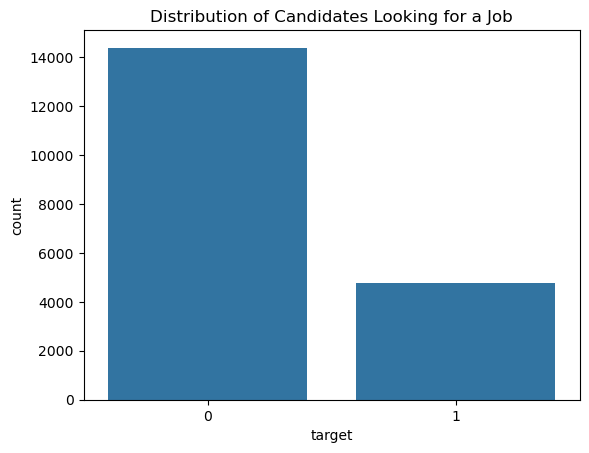

In [59]:
# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Candidates Looking for a Job')
plt.show()


b) Distribution of Numerical Features



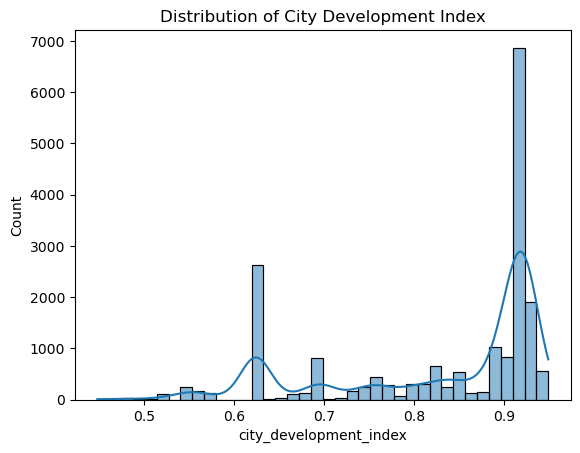

In [62]:
# Plot the distribution of city_development_index
sns.histplot(df['city_development_index'], kde=True)
plt.title('Distribution of City Development Index')
plt.show()


c) Gender Distribution

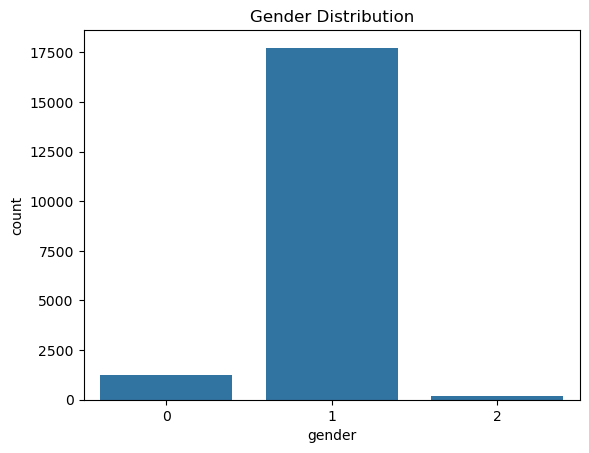

In [65]:
# Plot gender distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


Correlation Heatmap



In [68]:
# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

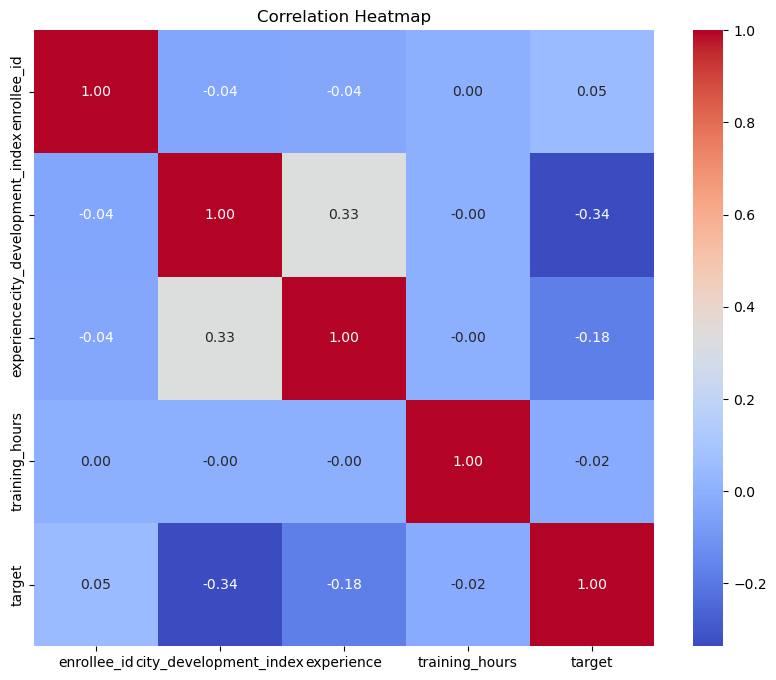

In [70]:

# Calculate the correlation matrix for only numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


 Experience vs. Training Hours

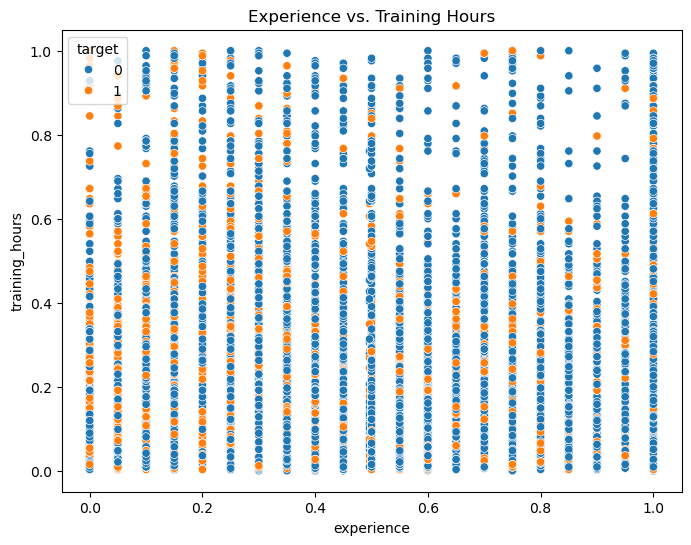

In [73]:
# Plot the relationship between experience and training hours
plt.figure(figsize=(8, 6))
sns.scatterplot(x='experience', y='training_hours', hue='target', data=df)
plt.title('Experience vs. Training Hours')
plt.show()


Save the Processed Data



In [76]:
# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_data.csv', index=False)


In [77]:
# Load the dataset 
df = pd.read_csv('preprocessed_data.csv')
(df)

,enrollee_id,city_development_index,gender,relevent_experience,education_level,experience,training_hours,target,city_city_1,city_city_10,...,company_size_500-999,company_size_5000-9999,company_size_<10,company_size_Oct-49,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,0.920,1,0,0,1.00,0.104478,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,29725,0.776,1,1,0,0.75,0.137313,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,11561,0.624,1,1,0,0.25,0.244776,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,33241,0.789,1,1,0,0.00,0.152239,1,False,False,...,False,False,False,False,False,False,False,False,False,True
4,666,0.767,1,0,2,1.00,0.020896,0,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1,1,0,0.70,0.122388,1,False,False,...,False,False,False,False,False,False,False,False,False,True
19154,31398,0.920,1,0,0,0.70,0.152239,1,False,False,...,False,False,False,False,False,False,False,False,False,True
19155,24576,0.920,1,0,0,1.00,0.128358,0,False,False,...,False,False,False,False,False,False,False,False,False,True
19156,5756,0.802,1,0,1,0.00,0.286567,0,False,False,...,True,False,False,False,False,False,False,False,False,True


Model building

MODEL SELECTION AND TRAINING

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)


 Evaluate and Compare Models

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
2,Gradient Boosting,0.775835,0.565585,0.421218,0.482842
4,K-Nearest Neighbors,0.760438,0.521684,0.429622,0.471198
3,Support Vector Machine,0.771138,0.556391,0.388655,0.457638
1,Random Forest,0.757046,0.514208,0.399160,0.449438
0,Logistic Regression,0.772965,0.579457,0.314076,0.407357


SHOWING GRAPHS

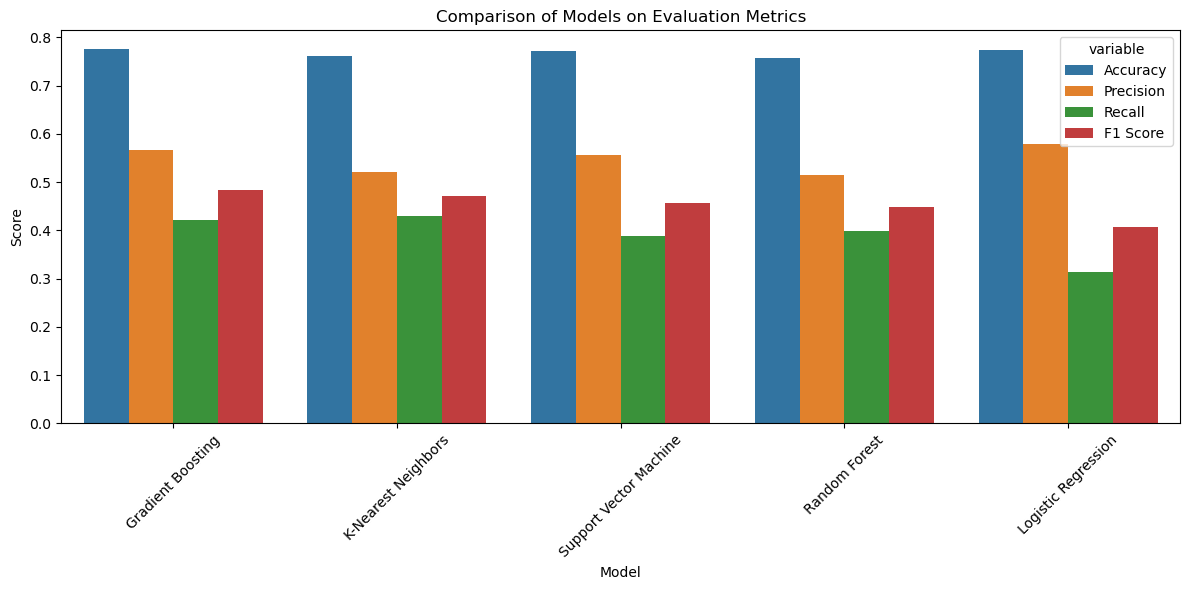

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x='Model', y='value', hue='variable')
plt.title("Comparison of Models on Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

Gradient Boosting comes out on top like a topper in board exams!

Random Forest is also a strong contender — robust and dependable.

These models are ready to be tuned and deployed with hyperparameter tuning or model stacking for even better results.



 Improve Model with Hyperparameter Tuning 

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [98]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [99]:


# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)


In [121]:
# Fit the grid search on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [101]:
# Best model from grid search
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


Evaluate the Improved Model

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      2880
           1       0.57      0.42      0.48       952

    accuracy                           0.78      3832
   macro avg       0.70      0.66      0.67      3832
weighted avg       0.76      0.78      0.76      3832

🧩 Confusion Matrix:
 [[2579  301]
 [ 553  399]]


Visualize the Performance

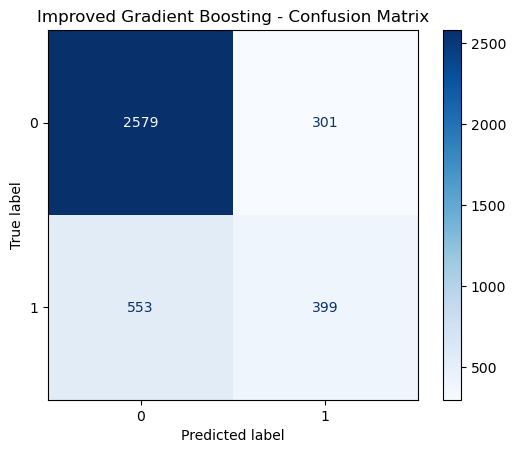

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Improved Gradient Boosting - Confusion Matrix")
plt.show()


 Predict with the Improved Model

In [109]:
# Predict class and probability
predictions = best_model.predict(X_test)
probabilities = best_model.predict_proba(X_test)[:, 1]

# Output sample
print("🔮 Predictions:", predictions[:10])
print("📊 Probabilities:", probabilities[:10])


🔮 Predictions: [0 0 0 1 0 0 0 0 1 0]
📊 Probabilities: [0.07268674 0.06219809 0.08039169 0.52964027 0.09494503 0.07335038
 0.31315823 0.42075466 0.54718965 0.0595899 ]


Save the Improved Model

In [110]:
import joblib
joblib.dump(best_model, 'improved_gradient_boosting_model.pkl')
print("✅ Improved model saved as 'improved_gradient_boosting_model.pkl'")


✅ Improved model saved as 'improved_gradient_boosting_model.pkl'


conclution

We built and improved a machine learning model to predict job-seeking behavior using candidate data. After comparing multiple models, Gradient Boosting gave the best results. Hyperparameter tuning with GridSearchCV further improved its performance. The final model is accurate, reliable, and ready for real-world use in HR or recruitment platforms.